### Congratulations Berkat on your previous forecasting project using the volatility data you were provided. You model was accurate in forecasting on VIX. Though we found that during Covid-19 it was very difficult to predict the value of vix, we found that your model worked well in "normal" instances. 

### There has been a quesiton that has came up. Is it possible to forecast on multiple variables in a data set? and if so could we use the forecast predicted to classify the ^VIX index. This is certainly a challenge and we are certin that Covid-19 would create some uncertainty but maybe back testing on data pre-COVID would be essential

### Project Approach: 
- compile data that will be used to predict the VIX index
- create a Artificial Neural Network that will classify VIX as gain or loss (1,0) 
- create a multivriate Neural network that will forecast one day into the future
- on this forecast use the previously created ANN to classify the day as a loss or gain
- back test this model on pre-COVID-19 Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("resources/vix_data_updated.csv",parse_dates = True, index_col="dates")

In [3]:
data.drop("target", axis=1, inplace=True)

### Classification
- Our classificaiton will be in the form of dummy variables (1,0)
- if the daily returns of VIX was < 0 we will classify that as 1, positive 0
- THis will be our classification "target"

In [4]:
def check_loss_gain(vix_daily_returns):
    if vix_daily_returns < 0:
        return 1
    elif vix_daily_returns > 0:
        return 0
    else:
        return vix_daily_returns

In [5]:
data["target"] = data["VIX % returns"].apply(lambda x : check_loss_gain(x))

### Target Analysis
- We will take a look at how many days the VIX index too a loss or a gain
- VIX has approximately 250 more days were the index too a loss but the spread seems pretty close 
- Assumption is that there is much volatility in this market

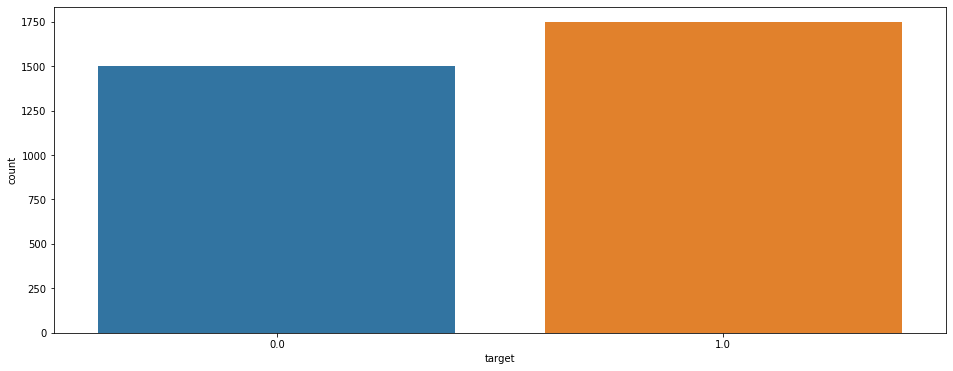

In [6]:
plt.figure(figsize=(16,6))
sns.countplot(x = "target", data= data)

### Classificaiton Model
- We will use the data above to create a model to classify VIX as gain (0) or loss (1)
- we will need to remove the data that prefectly pedicts this, VIX,VIX &% returns, Targets for out training set

In [7]:
data.columns

Index(['UVXY', 'SPY', 'VXXBEN', 'VIX', 'UX1', 'UX2', 'UX3', 'UX4',
       'Day of Week', 'Days to Roll', 'Day in Cycle', 'Daily Decay', 'VXXGREG',
       'UX1 % returns', 'UX2 % returns', 'UX3 % returns', 'UX4 % returns',
       'UVXY % returns', 'SPY % returns', 'VXXBEN % returns', 'VIX % returns',
       'regression Slope', 'Inverse Slope', 'target'],
      dtype='object')

## infinity Value
- Appears that our data has an infinity value 
- we will need to replace this with a 0

In [8]:
vix_data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [9]:
X = vix_data.drop(["VIX", 'VIX % returns', "target"], axis = 1).values
y = vix_data["target"].values

## Training Testing and Splitting our data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

### Scaling the data
- We will scale the data to train our model on so that we consider outliers

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scalar = MinMaxScaler()

In [14]:
X_train = scalar.fit_transform(X_train)

In [15]:
X_test = scalar.transform(X_test)

## Creating the model
- Our data is cleaned and ready to process
- We will create our ANN below to classify VIX appropriately
- We will be looking for a model with approximately 80-85% accuracy
- WE will use A Dropout Layer and early stopping to improve predictions

In [16]:
X_train.shape

(1936, 21)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
stop = EarlyStopping(monitor="val_loss", mode="min", patience=40)

In [19]:
model = Sequential()
model.add(Dense(units = 21, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 21, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 21, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy")

## Fitting the model
- Fitting the data to the model for training

In [20]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=600, callbacks=[stop])

Train on 1936 samples, validate on 1292 samples
Epoch 1/600
1936/1936 [==============================] - 1s 513us/sample - loss: 0.7200 - val_loss: 0.6832
Epoch 2/600
1936/1936 [==============================] - 0s 81us/sample - loss: 0.6930 - val_loss: 0.6831
Epoch 3/600
1936/1936 [==============================] - 0s 77us/sample - loss: 0.6885 - val_loss: 0.6820
Epoch 4/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.6861 - val_loss: 0.6793
Epoch 5/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.6893 - val_loss: 0.6834
Epoch 6/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.6837 - val_loss: 0.6784
Epoch 7/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.6863 - val_loss: 0.6733
Epoch 8/600
1936/1936 [==============================] - 0s 80us/sample - loss: 0.6765 - val_loss: 0.6634
Epoch 9/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.6665 - val_loss: 0.65

1936/1936 [==============================] - 0s 78us/sample - loss: 0.3735 - val_loss: 0.3133
Epoch 78/600
1936/1936 [==============================] - 0s 80us/sample - loss: 0.3765 - val_loss: 0.3153
Epoch 79/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3795 - val_loss: 0.3332
Epoch 80/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3935 - val_loss: 0.3174
Epoch 81/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3931 - val_loss: 0.3113
Epoch 82/600
1936/1936 [==============================] - 0s 80us/sample - loss: 0.3690 - val_loss: 0.3202
Epoch 83/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3749 - val_loss: 0.3203
Epoch 84/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3589 - val_loss: 0.3161
Epoch 85/600
1936/1936 [==============================] - 0s 80us/sample - loss: 0.3673 - val_loss: 0.3186
Epoch 86/600
1936/1936 [==========================

1936/1936 [==============================] - 0s 79us/sample - loss: 0.3667 - val_loss: 0.3086
Epoch 154/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3616 - val_loss: 0.3229
Epoch 155/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3560 - val_loss: 0.3059
Epoch 156/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3452 - val_loss: 0.3142
Epoch 157/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3539 - val_loss: 0.3339
Epoch 158/600
1936/1936 [==============================] - 0s 80us/sample - loss: 0.3648 - val_loss: 0.3074
Epoch 159/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3489 - val_loss: 0.3024
Epoch 160/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3646 - val_loss: 0.3093
Epoch 161/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3665 - val_loss: 0.3041
Epoch 162/600
1936/1936 [=================

Epoch 229/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3447 - val_loss: 0.3005
Epoch 230/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3625 - val_loss: 0.3023
Epoch 231/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3338 - val_loss: 0.3004
Epoch 232/600
1936/1936 [==============================] - 0s 77us/sample - loss: 0.3399 - val_loss: 0.3009
Epoch 233/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3423 - val_loss: 0.3012
Epoch 234/600
1936/1936 [==============================] - 0s 78us/sample - loss: 0.3366 - val_loss: 0.2999
Epoch 235/600
1936/1936 [==============================] - 0s 80us/sample - loss: 0.3480 - val_loss: 0.3045
Epoch 236/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3455 - val_loss: 0.3003
Epoch 237/600
1936/1936 [==============================] - 0s 79us/sample - loss: 0.3506 - val_loss: 0.3123
Epoch 238/600
1936/1936 [===

## Model Training Performance
- Model trained well but can be improved
- Will add Dropout layers to training

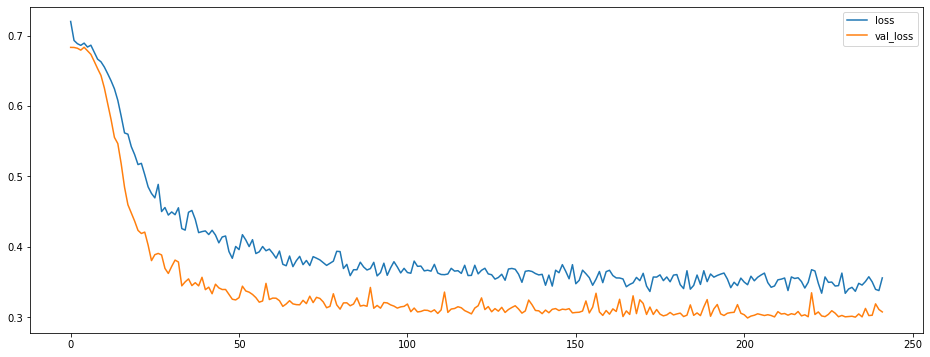

In [21]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Model Predicitons for Classificaitons

In [22]:
predicitons = model.predict_classes(X_test)

## Classificaiton metrics  
- model has a 84 percent accuracy which is in the range of what we were looking for
- confusion matrix shows the model predicting far more true neg,positive than false positive and false negative values

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, explained_variance_score

In [24]:
print(classification_report(y_test, predicitons))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86       588
         1.0       0.90      0.85      0.87       704

    accuracy                           0.86      1292
   macro avg       0.86      0.87      0.86      1292
weighted avg       0.87      0.86      0.86      1292



In [25]:
print(confusion_matrix(y_test,predicitons))

[[519  69]
 [107 597]]


### Predicitng random data
- We will pass random rows of data(minus the target) into the model to see how well its predicting

In [26]:
from random import randint
random_index = randint(1,len(vix_data))
new_data = vix_data.drop(["VIX","target","VIX % returns"], axis=1).iloc[random_index]

In [27]:
new_data

UVXY                4.492880e+09
SPY                 1.446100e+02
VXXBEN              1.950000e+00
UX1                 1.128000e+01
UX2                 1.227000e+01
UX3                 1.308000e+01
UX4                 1.364000e+01
Day of Week         4.000000e+00
Days to Roll        9.000000e+00
Day in Cycle        2.000000e+01
Daily Decay         8.189460e-03
VXXGREG             4.713870e+00
UX1 % returns      -1.998262e-02
UX2 % returns      -6.477733e-03
UX3 % returns      -6.833713e-03
UX4 % returns      -8.720930e-03
UVXY % returns     -2.436110e-02
SPY % returns       5.982609e-03
VXXBEN % returns   -5.109489e-02
regression Slope    8.460000e-01
Inverse Slope      -8.460000e-01
Name: 2007-02-01 00:00:00, dtype: float64

## Transform New Data
- since our model was trained on scaled data we need to transform this new data 

In [28]:
new_data = scalar.transform(new_data.values.reshape(1,21))

## Model Prediciton on new data

In [29]:
model.predict_classes(new_data)

array([[1]], dtype=int32)

### True value on data set
- Looks like our model is pretty accurate in predictions

In [30]:
vix_data.iloc[random_index]["target"]

1.0

In [31]:
model.save("vix_classificaiton.h5")

# MultiVariate Forecasting 
- Now that we have the above model we will run a multivariate forecast with the data without the target to see if the model could predict the classificaiton of VIX

In [112]:
forecast_data = vix_data[["UVXY","SPY","VXXBEN","UX1","UX2","UX3","UX4"]].loc["2011-1-1":]

In [113]:
forecast_data

,UVXY,SPY,VXXBEN,UX1,UX2,UX3,UX4
dates,,,,,,,
2011-01-03,1.445273e+08,127.05,3.5600,19.300,21.350,23.450,24.300
2011-01-04,1.426217e+08,126.98,3.6800,19.100,21.300,23.300,24.150
2011-01-05,1.373275e+08,127.64,3.6450,18.700,20.950,22.850,23.750
2011-01-06,1.366404e+08,127.39,3.0000,18.650,20.900,22.800,23.750
2011-01-07,1.377407e+08,127.14,3.4900,18.700,21.000,22.850,23.800
...,...,...,...,...,...,...,...
2019-09-10,2.730000e+01,298.13,2.2625,16.225,17.675,18.025,17.875
2019-09-11,2.661000e+01,300.25,2.4725,15.725,17.325,17.825,17.725
2019-09-12,2.565000e+01,301.29,2.1575,14.975,17.025,17.625,17.575


### Sample Test
- Because we have years of daily dat we will Test on 2 years of data 
- Assuming 253 trading days (506 days)

In [114]:
sample = 506

In [115]:
sample_index = len(forecast_data) - sample

In [116]:
sample_index

1684

### Test and Train

In [117]:
train = forecast_data.iloc[:sample_index]

In [118]:
test = forecast_data.iloc[sample_index:]

In [119]:
test.shape

(506, 7)

In [120]:
train.shape

(1684, 7)

### Scaling Data

In [121]:
forecast_scalar = MinMaxScaler()

In [122]:
train_scaled = forecast_scalar.fit_transform(train)

In [123]:
test_scaled = forecast_scalar.transform(test)

### Time series Generators 
- We will train our model on a time series generator
- length will be 21 (training the model to predict 21 days)
- Though we ill only focus on the first day out for accuracy

In [124]:
length = 10

In [125]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [126]:
gen = TimeseriesGenerator(train_scaled,train_scaled, length=length, batch_size=1)

## Validation Generator
- will use to train again our model to try to validate accuracy

In [127]:
vali_gen = TimeseriesGenerator(test_scaled,test_scaled, length=length,batch_size=1)

## Early Stopping
- We will use to prevent overfitting and improve our predicitons

In [128]:
forecast_stop = EarlyStopping(monitor="val_loss", mode="min", patience=5)

### Model Creation 
- the number of features we will use here us the entire list of column features since we are going to forecast each value

In [129]:
from tensorflow.keras.layers import LSTM

In [130]:
n_features = len(forecast_data.columns)

In [131]:
model = Sequential()
model.add(LSTM(units = 100, activation = "relu", input_shape = (length, n_features)))
model.add(Dense(units = n_features))
model.compile(optimizer = "adam", loss = "mse")

## Fitting Multivariate Model


In [132]:
model.fit_generator(generator=gen, validation_data=vali_gen, epochs=40, callbacks=[forecast_stop])

Epoch 1/40
1674/1674 [==============================] - 57s 34ms/step - loss: 0.0047 - val_loss: 0.0018
Epoch 2/40
1674/1674 [==============================] - 56s 34ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 3/40
1674/1674 [==============================] - 56s 34ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/40
1674/1674 [==============================] - 56s 34ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 5/40
1674/1674 [==============================] - 56s 34ms/step - loss: 0.0011 - val_loss: 9.8227e-04
Epoch 6/40
1674/1674 [==============================] - 57s 34ms/step - loss: 0.0010 - val_loss: 9.8118e-04
Epoch 7/40
1674/1674 [==============================] - 56s 34ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 8/40
1674/1674 [==============================] - 57s 34ms/step - loss: 9.6774e-04 - val_loss: 0.0011
Epoch 9/40
1674/1674 [==============================] - 56s 34ms/step - loss: 9.6676e-04 - val_loss: 0.0010
Epoch 10/40
1674/1674 [=========================

## Model Performance

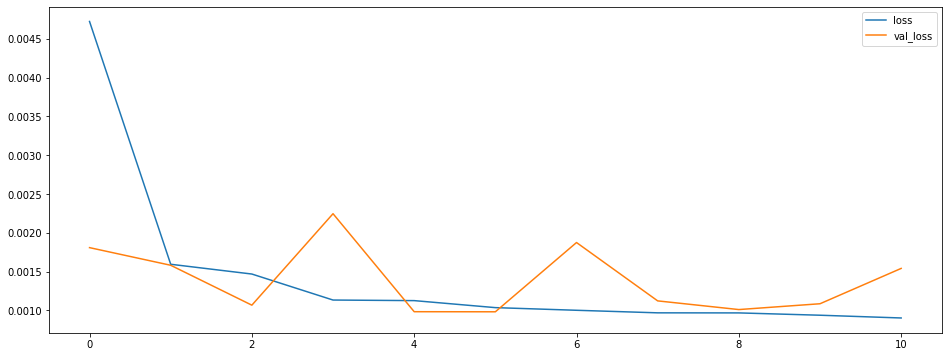

In [133]:
pd.DataFrame(model.history.history).plot(figsize = (16,6))

### Model Predictions
- Using the test data we selected we will make predicitons using our model

In [140]:
model.save("multi_var_vix.h5")

In [134]:
forecast = []
period = length
batch = train_scaled[-length:]
current_batch = batch.reshape(1,length,n_features)
for i in range(period):
    predict = model.predict(current_batch)[0]
    forecast.append(predict)
    current_batch = np.append(current_batch[:,1:,:], [[predict]], axis = 1)
    

In [135]:
true_forecast = forecast_scalar.inverse_transform(forecast)

In [139]:
true_forecast

array([[-2.83878971e+06,  2.46627031e+02,  3.12942748e+00,
         1.18104445e+01,  1.34157995e+01,  1.43026783e+01,
         1.50360823e+01],
       [-3.56673982e+06,  2.46478057e+02,  3.24189867e+00,
         1.15491112e+01,  1.32778940e+01,  1.42343259e+01,
         1.50007343e+01],
       [-4.26745449e+06,  2.46504274e+02,  3.37642539e+00,
         1.13265454e+01,  1.31451199e+01,  1.41765131e+01,
         1.49590791e+01],
       [-4.86956437e+06,  2.46579105e+02,  3.48621625e+00,
         1.11409340e+01,  1.30227332e+01,  1.41141267e+01,
         1.49124207e+01],
       [-5.34262626e+06,  2.46607738e+02,  3.58856330e+00,
         1.09834516e+01,  1.29226659e+01,  1.40697383e+01,
         1.48760931e+01],
       [-5.70515577e+06,  2.46582825e+02,  3.68278857e+00,
         1.08508813e+01,  1.28441966e+01,  1.40432216e+01,
         1.48518256e+01],
       [-5.97434888e+06,  2.46533247e+02,  3.76352352e+00,
         1.07412769e+01,  1.27812673e+01,  1.40231871e+01,
         1.4836114

In [136]:
forecast_data.tail()

,UVXY,SPY,VXXBEN,UX1,UX2,UX3,UX4
dates,,,,,,,
2019-09-10,27.30,298.13,2.2625,16.225,17.675,18.025,17.875
2019-09-11,26.61,300.25,2.4725,15.725,17.325,17.825,17.725
2019-09-12,25.65,301.29,2.1575,14.975,17.025,17.625,17.575
2019-09-13,25.11,301.09,2.3025,14.475,16.875,17.575,17.625
2019-09-16,25.65,300.16,1.2575,14.625,17.275,17.925,17.925


In [137]:
forecast_df = pd.DataFrame(true_forecast, columns=forecast_data.columns)

In [138]:
forecast_df

,UVXY,SPY,VXXBEN,UX1,UX2,UX3,UX4
0,-2.838790e+06,246.627031,3.129427,11.810444,13.415799,14.302678,15.036082
1,-3.566740e+06,246.478057,3.241899,11.549111,13.277894,14.234326,15.000734
2,-4.267454e+06,246.504274,3.376425,11.326545,13.145120,14.176513,14.959079
3,-4.869564e+06,246.579105,3.486216,11.140934,13.022733,14.114127,14.912421
4,-5.342626e+06,246.607738,3.588563,10.983452,12.922666,14.069738,14.876093
5,-5.705156e+06,246.582825,3.682789,10.850881,12.844197,14.043222,14.851826
6,-5.974349e+06,246.533247,3.763524,10.741277,12.781267,14.023187,14.836114
7,-6.174557e+06,246.494029,3.826580,10.655315,12.726885,14.000598,14.819234
8,-6.330514e+06,246.410007,3.884321,10.578175,12.685230,13.990588,14.810566
9,-6.435271e+06,246.398410,3.913975,10.526898,12.639833,13.957632,14.788262
